# 1. Thông tin chung
Thành viên:

|MSSV|Họ tên|
|----|-----|
|19120080|Lê Đức Huy|
|19120298|Mai Duy Nam|

# 2. Thông tin về dữ liệu

## 2.1 Thông tin chung
Dataset trong đồ án này được lấy từ Kaggle tại [đây](https://www.kaggle.com/halhuynh/it-jobs-dataset).

Dataset này chứa thông tin về các công ty IT ở Việt Nam và các công việc được đăng tải bởi các công ty này. Dữ liệu này được tác giả crawl từ trang web [ITviec](https://itviec.com/). Dataset này bao gồm 2 file:
* `companies.csv` chứa thông tin về các công ty (tên công ty, lượt rating, lượt review, địa chỉ, v.v.) có tăng tải việc làm trên ITviec
* `jobs.csv` chứa thông tin về việc làm được đăng tải bởi các công ty (tên công việc, mô tả, yêu cầu kỹ năng, v.v.)

Hai tập dữ liệu này có mối liên hệ với nhau thông qua cột `company_id`.

## 2.2 Khám phá dữ liệu

Ở các phần sau, ta lần lượt khám phá 2 bộ dữ liệu `companies` và `jobs` thu thập được

### 2.2.1 `companies`

#### Nạp dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
companies_df = pd.read_csv('dataset/companies.csv')
companies_df.head()

,company_id,company_name,average_rating,num_review,city,type,num_employee,country,working_day,OT,overview,expertise,benifit,logo_link
0,kms-technology,KMS Technology,4.0,197 Reviews,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...,https://itviec.com/rails/active_storage/repres...
1,nab-in-collaboration-with-positive-thinking-co...,NAB in collaboration with Positive Thinking Co...,4.4,11 Reviews,Ho Chi Minh,Product,501-1000,Australia,Monday - Friday,No OT,NAB in collaboration with Positive Thinking Co...,Languages &amp; Frameworks\n\n\nJavaScript ES6...,THE BENEFITS AND PERKS\n\n\n\n\nVery competiti...,https://itviec.com/rails/active_storage/repres...
2,robert-bosch-engineering-and-business-solutions,Robert Bosch Engineering And Business Solutions,3.2,217 Reviews,"Ho Chi Minh, Ha Noi",Product,1-50,Germany,Monday - Friday,No OT,Robert BOSCH Engineering and Business Solution...,Embedded Software for Automotive Applications\...,Why \nBOSCH\n?\n\nBecause we don't just follow...,https://itviec.com/rails/active_storage/repres...
3,gft-technologies-vietnam,GFT Technologies Vietnam,NaN,Reviews,"Ho Chi Minh, Ha Noi",Outsourcing,51-150,Germany,Monday - Friday,No OT,Working at GFT Vietnam\n\n\nGFT is driving the...,"Technical frameworks\n\n\nJava/Kotlin, Spring ...",HR benefits\n\n\n\n\nCompetitive salary\n\n\nS...,https://itviec.com/rails/active_storage/repres...
4,tyme,Tyme,4.6,29 Reviews,"Ho Chi Minh, Ha Noi",Product,151-300,Vietnam,Monday - Friday,No OT,Tyme Vietnam\n is the international arm of \nT...,Mobile/ Tablet Development: \nNative Android/i...,Our goal is simple: to be the #1 digital techn...,https://itviec.com/rails/active_storage/repres...


#### Số lượng dòng và cột

In [3]:
print('Number of rows: {}\nNumber of columns: {}'.format(*companies_df.shape))

Number of rows: 2041
Number of columns: 14


#### Các dòng có ý nghĩa gì?
Mỗi dòng chứa thông tin của một công ty dựa theo trang ITviec. Mỗi công ty có một ID duy nhất.

Kiểm tra có dòng nào bị lặp hay không.

In [4]:
companies_df.duplicated().sum() != 0

False

Kiểm tra có ID công ty nào bị lặp hay không.

In [5]:
companies_df.duplicated('company_id').sum() != 0

False

#### Các cột có ý nghĩa gì?
Tác giả của bộ dữ liệu không mô tả chi tiết về ý nghĩa của các một mà chỉ nói "The column names are self-explained". Do đó ta phải tự suy luận về ý nghĩa của các cột:
* `company_id`: ID của công ty
* `company_name`: tên công ty
* `average_rating`: số điểm rating trung bình của công ty trên thang điểm 5
* `num_review`: số lượt review công ty
* `city`: thành phố
* `type`: loại hình công ty (outsourcing hay product)
* `num_employee`: số lượng nhân viên
* `country`: quốc gia
* `working_day`: ngày làm việc trong tuần
* `OT`: các chính sách về làm thêm giờ
* `overview`: tổng quan về công ty
* `expertise`: lĩnh vực chuyên ngành
* `benifit` (sai chính tả, phải là `benefit`): lợi ích khi tham gia công ty
* `logo_link`: đường dẫn đến logo công ty

Có một vấn đề về ý nghĩa các cột: cột `city` không thống nhất với cột `country` (có công ty có thành phố là `Ho Chi Minh` nhưng quốc gia là `Australia`). Do các công ty có thể có nhiều trụ sở đặt ở nhiều quốc gia, trong cùng quốc gia cũng được đặt ở nhiều thành phố khác nhau, cho nên trong các bước phân tích tiếp theo ta sẽ giả sử hai cột `city` và `country` có ý nghĩa như sau:
* Cột `city` chứa các thành phố ở Việt Nam nơi các văn phòng của công ty được đặt.
* Cột `country` chứa quốc gia nơi trụ sở chính của công ty được đặt.

Các cột còn lại đều có ý nghĩa rõ ràng, không có gì gây khó hiểu.

Trước khi đến bước phân tích tiếp theo, ta thực hiện một số thay đổi về các cột như sau:
* Đổi tên các cột cho hợp lý:
    * Đổi tên cột `benifit` bị sai chính tả
    * Đổi tên cột `city`, `num_review`, `num_employee` và `working_day` thành số nhiều
    * Đổi tên cột `OT` thành `overtime` để thống nhất với các tên cột còn lại
* Loại bỏ cột `logo_link` do không cần thiết

In [6]:
companies_df.rename(columns={'benifit': 'benefit',
                             'city': 'cities',
                             'num_review': 'num_reviews',
                             'num_employee': 'num_employees',
                             'working_day': 'working_days',
                             'OT': 'overtime'}, inplace=True)
companies_df.drop(columns='logo_link', inplace=True)

#### Mỗi cột có kiểu dữ liệu thế nào và có phù hợp để xử lý tiếp không?

In [7]:
companies_df.dtypes

company_id         object
company_name       object
average_rating    float64
num_reviews        object
cities             object
type               object
num_employees      object
country            object
working_days       object
overtime           object
overview           object
expertise          object
benefit            object
dtype: object

Có hai cột có thể phải cân nhắc chuyển về dạng số là `num_reviews` và `num_employees`. Các cột khác đều đã có kiểu dữ liệu phù hợp.

Đối với cột `num_employees`, dữ liệu của ta được thu thập theo dạng một khoảng giá trị. Việc chuyển đổi cột này về dạng số hay không phụ thuộc vào phân tích nào mà ta đang thực hiện. Do đó tạm thời ở bước này ta không thay đổi cột `num_employees`.

In [8]:
companies_df.num_employees.unique()

array(['1000+', '501-1000', '1-50', '51-150', '151-300', '301-500'],
      dtype=object)

Đối với `num_reviews`, kiểm tra các giá trị unique của nó, ta thấy các giá trị đều có dạng: `"<một số> Review[s]"`, ngoại trừ giá trị duy nhất không tuân theo pattern này là `Reviews`. Vì vậy, ta có thể lấy ra giá trị số, lọc bỏ chuỗi ` Reviews` dư thừa và chuyển kiểu dữ liệu cột thành dạng float. Đối với giá trị `Reviews`, ta gán bằng NaN.

In [9]:
companies_df.num_reviews.unique()

array(['197 Reviews', '11 Reviews', '217 Reviews', 'Reviews',
       '29 Reviews', '16 Reviews', '8 Reviews', '60 Reviews', '9 Reviews',
       '127 Reviews', '6 Reviews', '34 Reviews', '3 Reviews',
       '20 Reviews', '185 Reviews', '1486 Reviews', '57 Reviews',
       '22 Reviews', '68 Reviews', '1 Review', '21 Reviews', '12 Reviews',
       '23 Reviews', '7 Reviews', '17 Reviews', '5 Reviews', '96 Reviews',
       '37 Reviews', '207 Reviews', '109 Reviews', '4 Reviews',
       '33 Reviews', '76 Reviews', '18 Reviews', '10 Reviews',
       '2 Reviews', '65 Reviews', '15 Reviews', '41 Reviews',
       '19 Reviews', '27 Reviews', '13 Reviews', '26 Reviews',
       '42 Reviews', '183 Reviews', '24 Reviews', '54 Reviews',
       '14 Reviews', '38 Reviews', '451 Reviews', '28 Reviews',
       '36 Reviews', '52 Reviews', '31 Reviews', '92 Reviews',
       '30 Reviews', '86 Reviews', '32 Reviews', '25 Reviews',
       '43 Reviews', '46 Reviews', '97 Reviews', '44 Reviews',
       '226 Revi

In [10]:
import re
def get_num_reviews(x):
    result = re.match('^(\d+) Reviews?$', x)
    return float(result.group(1)) if result != None else np.nan
companies_df.num_reviews = companies_df.num_reviews.map(get_num_reviews, na_action='ignore')
companies_df.num_reviews.unique()

array([1.970e+02, 1.100e+01, 2.170e+02,       nan, 2.900e+01, 1.600e+01,
       8.000e+00, 6.000e+01, 9.000e+00, 1.270e+02, 6.000e+00, 3.400e+01,
       3.000e+00, 2.000e+01, 1.850e+02, 1.486e+03, 5.700e+01, 2.200e+01,
       6.800e+01, 1.000e+00, 2.100e+01, 1.200e+01, 2.300e+01, 7.000e+00,
       1.700e+01, 5.000e+00, 9.600e+01, 3.700e+01, 2.070e+02, 1.090e+02,
       4.000e+00, 3.300e+01, 7.600e+01, 1.800e+01, 1.000e+01, 2.000e+00,
       6.500e+01, 1.500e+01, 4.100e+01, 1.900e+01, 2.700e+01, 1.300e+01,
       2.600e+01, 4.200e+01, 1.830e+02, 2.400e+01, 5.400e+01, 1.400e+01,
       3.800e+01, 4.510e+02, 2.800e+01, 3.600e+01, 5.200e+01, 3.100e+01,
       9.200e+01, 3.000e+01, 8.600e+01, 3.200e+01, 2.500e+01, 4.300e+01,
       4.600e+01, 9.700e+01, 4.400e+01, 2.260e+02, 1.790e+02, 6.600e+01,
       4.500e+01, 4.900e+01, 5.800e+01, 2.320e+02, 8.700e+01])

#### Với mỗi cột kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [11]:
numerical_columns = ['average_rating', 'num_reviews']
categorical_columns = companies_df.columns.to_list()
categorical_columns.remove('average_rating')
categorical_columns.remove('num_reviews')

In [12]:
companies_df[numerical_columns].describe()

,average_rating,num_reviews
count,563.000000,869.000000
mean,3.987034,12.989643
std,0.597378,57.202636
min,2.000000,1.000000
25%,3.600000,2.000000
50%,4.000000,4.000000
75%,4.400000,10.000000
max,5.000000,1486.000000


In [13]:
companies_df[numerical_columns].isna().sum() / companies_df[numerical_columns].shape[0] * 100

average_rating    72.415483
num_reviews       57.422832
dtype: float64

Có thể thấy, số lượng giá trị thiếu của các cột số là khá lớn. Còn lại, các số liệu thống kê khác đều ổn, không có điều gì bất thường.

#### Với mỗi cột dạng phân loại, các giá trị được phân bố thế nào

In [14]:
desc = companies_df[categorical_columns].describe()
desc

,company_id,company_name,cities,type,num_employees,country,working_days,overtime,overview,expertise,benefit
count,2041,2041,2041,2041,2041,2041,2026,1865,2040,477,1576
unique,2041,2041,71,2,6,39,2,4,2022,474,1573
top,topenland-viet-nam,ZENSHO HÀ NỘI SYSTEM CENTER,"District 1, Ho Chi Minh",Product,1-50,Vietnam,Monday - Friday,No OT,.,"We are specialized in Digital Architecture, We...",Very attractive salaries that commensurate wit...
freq,1,1,190,1534,1054,1202,1855,1589,12,2,2


Tỷ lệ giá trị thiếu

In [15]:
(1 - desc.loc['count'] / companies_df.shape[0]) * 100

company_id             0.0
company_name           0.0
cities                 0.0
type                   0.0
num_employees          0.0
country                0.0
working_days      0.734934
overtime          8.623224
overview          0.048996
expertise        76.629103
benefit           22.78295
Name: count, dtype: object

Một số giá trị ngẫu nhiên

In [16]:
companies_df[categorical_columns].sample(8)

,company_id,company_name,cities,type,num_employees,country,working_days,overtime,overview,expertise,benefit
119,wiin-viet-nam,WIIN VIỆT NAM,"Ha Noi, Ho Chi Minh",Product,1-50,United States,Monday - Saturday,No OT,Wiin is a US-based e-commerce company that has...,NaN,Leaves: 12 days leave and Tet and other holida...
643,s3-innovate-pte-ltd,S3 Innovate Pte. Ltd.,Ho Chi Minh,Product,51-150,Singapore,Monday - Friday,No OT,"Singapore-based, high tech company founded by ...",NaN,We provide our staff with:\n\n- Very attractiv...
1228,appvity,Appvity,"Tan Binh, Ho Chi Minh",Product,51-150,United States,Monday - Friday,No OT,Appvity provides innovative products and full ...,Typescript,Appvity offers a competitive benefits package ...
1348,geo-system-solutions-vietnam,GEO System Solutions Vietnam,"District 1, Ho Chi Minh",Product,1-50,Japan,Monday - Friday,Extra salary for OT,Our Parent Company: \nGEO HOLDINGS COPORATION ...,NaN,Work Hours\n\n\n8:00 - 17:00\n\n※ After the pr...
137,guardrails,GuardRails,"Ho Chi Minh, Ha Noi",Product,1-50,Singapore,Monday - Friday,No OT,"GuardRails, an end-to-end application security...",NaN,"GuardRails, an end-to-end application security..."
618,ladipage-viet-nam,LADIPAGE VIỆT NAM,"Nam Tu Liem, Ha Noi",Product,51-150,Vietnam,Monday - Friday,No OT,"Là Đơn vị có sản phẩm tiên phong ""Top of mind'...",NaN,Mức thưởng cao hấp dẫn.\n\nĐược đào tạo nâng c...
2004,ab-media,AB MEDIA,"Hai Chau, Da Nang",Product,51-150,Vietnam,Monday - Friday,No OT,AB Media với mong muốn đem lại những giá trị l...,NaN,Salary and benefits\n\n\n\n\n\nSalary can be d...
829,genesys,Genesys,"Binh Thanh, Ho Chi Minh",Product,51-150,Vietnam,NaN,NaN,"Trong thời đại 4.0, Google được đánh giá là mộ...",NaN,"- Nhân sự là những người trẻ, thân thiện.\n\n-..."


Có thể thấy dữ liệu dạng phân loại khá đầy đủ (ngoại trừ cột `expertise` số lượng giá trị thiếu lên đến 70%).

### 2.2.2 `jobs`

#### Nạp dữ liệu

In [17]:
jobs_df = pd.read_csv('dataset/jobs.csv')
jobs_df.head()

,job_id,company_id,job_name,taglist,location,three_reasons,description
0,kms-technology:jrsr_qa_engineer_kms_labs_bonus,kms-technology,"(Jr/Sr) QA Engineer, KMS Labs - BONUS",QA QC English Tester,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs is the startup incubation arm of KMS ...
1,kms-technology:engineering_manager_bonus,kms-technology,Engineering Manager - BONUS,Project Manager Agile English,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary. ***Apply and Join in S...
2,kms-technology:fullstack_mobile_mobilenodejs_k...,kms-technology,"Fullstack Mobile (Mobile,NodeJs) Kobiton",NodeJS React Native Fresher Accepted,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,is the mobile experience platform trusted by l...
3,kms-technology:jrsrprincipal_java_developer_bonus,kms-technology,(Jr/Sr/Principal) Java Developer- BONUS,Java JavaScript Spring,"174 Thai Ha, Dong Da, Ha Noi",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary ***Apply and Join in Se...
4,kms-technology:product_manager_kms_labs_bonus,kms-technology,"Product Manager, KMS Labs - BONUS",Product Manager English Manager,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs\n is the startup incubation arm of KM...


#### Số lượng dòng và cột

In [18]:
print('Number of rows: ', jobs_df.shape[0])
print('Number of columns: ', jobs_df.shape[1])

Number of rows:  1412
Number of columns:  7


#### Mỗi dòng có ý nghĩa gì ?

Mỗi dòng là thông tin của một công việc đang được đăng tin tuyển dụng trên ITViec.

Mỗi dòng được phân biệt bởi `job_id`

#### Dữ liệu có bị lặp không?

In [19]:
jobs_df.duplicated().sum() != 0

False

Như vậy dữ liệu không bị trùng lặp giữa các dòng.

Kiểm tra cột `job_id` có bị lặp không?

In [20]:
jobs_df.duplicated('job_id').sum() != 0

True

Như vậy ở cột `job_id` có dữ liệu trùng lặp. Ta sẽ kiểm tra tiếp ở dưới.

Trích xuất các dòng có dữ liệu lặp:

In [21]:
jobs_df[jobs_df.duplicated('job_id', keep=False)]

,job_id,company_id,job_name,taglist,location,three_reasons,description
301,houze-group:backend_lead_pythongolangnodejs,houze-group,Backend Lead ( Python/Golang/NodeJS),NodeJS Python Golang,"114-116 Ngô Quyền, Phường 8, District 5, Ho Ch...",Attractive salary and benefits package\nCareer...,"Define, code, test, and deploy new features to..."
303,houze-group:backend_lead_pythongolangnodejs,houze-group,Backend Lead ( Python/Golang/NodeJS/...),Team Leader Python Golang,"114-116 Ngô Quyền, Phường 8, District 5, Ho Ch...",Attractive salary and benefits package\nCareer...,"Define, code, test, and deploy new features to..."


Như vậy theo quan sát, ta thấy giữa 2 dòng chỉ khác biệt ở cột `taglist`, tất cả các cột còn lại đều giống nhau.

Ở đây cả bộ dữ liệu chỉ duy nhất 1 `job_id` bị trùng lặp. Để tiện xử lý ta sẽ loại bỏ 1 hàng (cụ thể hàng cuối).

In [22]:
jobs_df = jobs_df.drop_duplicates('job_id', keep = 'first')

Số lượng dòng sau khi xử lý:

In [23]:
print('Number of rows: ', len(jobs_df))

Number of rows:  1411


#### Mỗi cột có ý nghĩa gì?

Bởi dữ liệu được thu thập trên Kaggle, tuy nhiên tác giả không cung cấp thông tin về ý nghĩa của các cột, chính vì thế, dựa vào ý nghĩa của dữ liệu ta sẽ định nghĩa các cột như sau:
   * `job_id`: ID của công việc
   * `company_id`: ID của công ty đăng tuyển công việc
   * `job_name`: tên công việc
   * `taglist`: danh sách tag liên quan đến công việc
   * `location`: địa điểm làm việc
   * `three_reasons`: phúc lợi/lý do nên làm việc ở đây
   * `description`: mô tả công việc

#### Mỗi cột có kiểu dữ liệu gì? Có phù hợp để xử lý tiếp không?

In [24]:
jobs_df.dtypes

job_id           object
company_id       object
job_name         object
taglist          object
location         object
three_reasons    object
description      object
dtype: object

Như đã thấy tất cả thông tin về công việc không có cột nào nên đưa về dạng số nên ta không cần xử lý gì thêm ở bước này, tất cả dữ liệu đã có kiểu dữ liệu phù hợp để xử lý.

#### Phân tích các cột dữ liệu dạng số

Trong các cột dữ liệu trên, không có cột dữ liệu nào dạng số nên ta không thể thống kê các giá trị được.

#### Với mỗi cột dang phân loại, các giá trị được phân bố như thế nào?

In [25]:
statistic = jobs_df.describe()
statistic

,job_id,company_id,job_name,taglist,location,three_reasons,description
count,1411,1411,1411,1411,1411,1097,1411
unique,1411,682,1358,923,696,492,1408
top,nvg-technology:senior_frontend_engineer_reactjs,vietnam-international-bank-vib,"Frontend Dev (JavaScript, HTML5, CSS)",JavaScript HTML5 CSS,"Sailing Tower Building, District 1, Ho Chi Minh",Global Exposure\nFast Track Career\nDiversifie...,Receive a full 13th month Tet bonus as long as...
freq,1,27,8,20,19,17,2


Số lượng giá trị thiếu ở mỗi cột:

In [26]:
miss_info = len(jobs_df) - statistic.loc['count']
miss_info

job_id             0
company_id         0
job_name           0
taglist            0
location           0
three_reasons    314
description        0
Name: count, dtype: object

Tỉ lệ giá trị thiếu:

In [27]:
miss_info/len(jobs_df) * 100

job_id                 0.0
company_id             0.0
job_name               0.0
taglist                0.0
location               0.0
three_reasons    22.253721
description            0.0
Name: count, dtype: object

Như đã thống kê, đa phần các cột có đầy đủ các dữ liệu trừ cột `three_reason` tỉ lệ thiếu lên tới 22,25\%.
Nhìn vào hàng `unique`, đa phần có giá trị khá lớn, cho thấy được sự đa dạng của việc tuyển dụng ở lĩnh vực IT.

Một số giá trị ngẫu nhiên:

In [28]:
jobs_df.sample(10)

,job_id,company_id,job_name,taglist,location,three_reasons,description
629,nct-corporation:product_owner,nct-corporation,Product Owner,Product Manager UI-UX Business Analyst,"Floor 19th, The 678 Tower, No 67, Hoang Van Th...",Salary 13th (SIHIUI_Full Gross)\nPTI \n16 annu...,"Research and analyze the market, the users, an..."
261,wonderlabs:remote_web_developer_reactjs_net,wonderlabs,Remote Web Developer (ReactJS/ .Net),ReactJS .NET,"39 Le Thach Street, District 4, Ho Chi Minh",Working with leading companies from Singapore ...,We are looking for a skilled and creative Web ...
1041,saaspiens:senior_net_developer_up_to_1500,saaspiens,Senior .Net Developer - Up To $1500,.NET C# JavaScript,"B1 Buu Long Street, Ward 15, District 10, Ho ...",NaN,• Tham gia vào các dự án phát triển sản phẩm c...
545,hanet-viet-nam-cn-hcm:product_owner,hanet-viet-nam-cn-hcm,Product Owner,Product Manager Business Analyst,"IPC Tower, 1489 Nguyễn Văn Linh, District 7, H...",NaN,Làm việc trực tiếp với Tổng giám Đốc và phối h...
948,vinx-vietnam:it_support_specialist,vinx-vietnam,IT Support Specialist,IT Support System Admin Networking,"WASECO building,10 Pho Quang Street, Tan Binh,...",Nền tảng cơ sở vững chắc\nĐội ngũ nhân lực chu...,- Carry out IT related jobs as and when requir...
1122,aleph-vietnam:react_native_developer,aleph-vietnam,React Native Developer,React Native ReactJS Fresher Accepted,"NA, Ho Chi Minh","Professional environment - dynamic, young peop...",We are looking for a React Native developer in...
306,vietjetair-cargo-jsc:ui_ux_designer,vietjetair-cargo-jsc,UI UX Designer,UI-UX Designer,"6th Floor, Vietjet Plaza Building, 60A Truong ...",NaN,Work closely with the Product Owner to make su...
354,codelink:net_core_caspnetjava_to2k5bonus,codelink,.NET Core (C#/ASP.NET/Java) to$2k5+Bonus,.NET Java ASP.NET,"131 Xo Viet Nghe Tinh, Binh Thanh, Ho Chi Minh",Global product & excellent team\nFocus on qual...,CodeLink is an innovative and design-focused d...
951,bigtrees:fresher_junior_flutter_developer,bigtrees,Fresher/ Junior Flutter Developer,Flutter PHP Fresher Accepted,"3 Lô K1 Đường số 40 KDC Tân Quy Đông, District...",We will bring out a better of you.\nWe promise...,+ Develop mobile applications for Australian c...
1010,solid:frjr_nodejs_dev_typescript_reactjs,solid,"Fr/Jr NodeJS Dev (TypeScript, ReactJS)",NodeJS JavaScript ReactJS Fresher Accep...,"Số 35 ngõ 100 Dịch Vọng Hậu, phường Dịch Vọng ...",Môi trường startup trẻ trung\nLộ trình thăng t...,Phát triển các ứng dụng backend với ngôn ngữ N...


Dữ liệu cho thấy được không có sự bất thường ở bộ dữ liệu này.
Tuy nhiên dữ liệu ở 2 cột `three_reasons` và `description` có các dòng dữ liệu thuộc 2 ngôn ngữ khác nhau (Việt và Anh) có thể gây khó khăn trong việc phân tích.

In [29]:
a = jobs_df.taglist.map(lambda x: x.strip().split('   '))

In [30]:
b = a.explode()

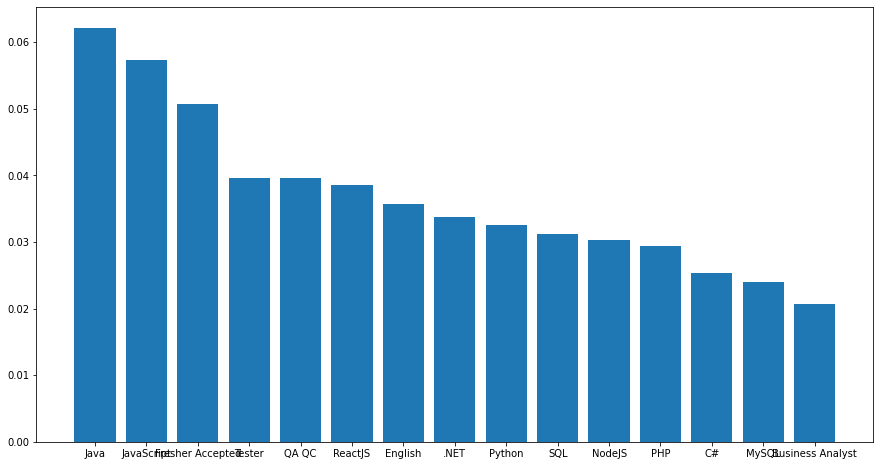

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
vc = b.value_counts(normalize=True)
ax.bar(vc.index[:15], vc[:15])
plt.show()

# 3. Câu hỏi cần trả lời

## 3.1 Các kiến thức/kỹ năng nào đang được các công ty tuyển dụng nhiều nhất?

### 3.1.1 Nêu vấn đề

Trên thực tế, nhiều người chọn học ngành IT nghĩ rằng vì ngành này hot, lương cao, nhiều việc làm. Tuy nhiên ngành IT lại quá nhiều định hướng, dẫn đến đại đa số sinh viên theo học ngành này nếu không đam mê hay định hướng cụ thể thì sẽ bị mông lung không biết nên học theo hướng nào? và họ luôn suy nghĩ rằng học hướng đó liệu có tìm được việc làm hay không? nên học kỹ năng nào, kiến thức nào để có thể dễ dàng tìm được việc làm?

Chính vì thế, câu hỏi này ra đời nhằm mục đích cho biết hiện nay, trên thị trường ngành IT, người ta đang tuyển nhân sự có những kỹ năng gì là chủ yếu, giúp cho sinh viên có thể lựa chọn được những hướng đi phù hợp, có thể dễ dàng tìm kiếm việc làm vì nhu cầu cần thiết của xã hội cao.

### 3.1.2 Data Preprocessing

Qua quá trình quan sát dữ liệu, ta biết được thông tin cột `taglist` thể hiện những kỹ năng/kiến thức liên quan đến ngành nghề IT đang được tuyển dụng.
Quá trình xử lý dữ liệu:
* Lấy các giá trị cột `taglist` và bỏ đi các giá trị rỗng.
* Do cấu trúc dữ liệu cột này chưa phù hợp, ta sẽ biến các tag này thành dạng list.
* Gom nhóm

Đầu tiên, ta lấy dữ liệu cột `taglist` và bỏ các giá trị rỗng.

In [32]:
#Do giá trị rỗng không có (đã khám phá ở trên) nên ta không cần bước bỏ các dòng dữ liệu thiếu.
taglist = jobs_df["taglist"]
taglist

0                        QA QC   English   Tester 
1               Project Manager   Agile   English 
2        NodeJS   React Native   Fresher Accepted 
3                      Java   JavaScript   Spring 
4             Product Manager   English   Manager 
                           ...                    
1407                           Unity   C#   Games 
1408       .NET   C#   ASP.NET   Fresher Accepted 
1409                          .NET   C#   ASP.NET 
1410                JavaScript   NodeJS   ReactJS 
1411                    Python   Django   ReactJS 
Name: taglist, Length: 1411, dtype: object

Kiểu dữ liệu hiện tại của mỗi hàng là gì?

In [33]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))  
    return dtypes

open_object_dtype(taglist)

{str}

Như đã thấy phía trên, dữ liệu hiện tại của các hàng taglist là string.

Ta cần đưa về dạng list để dễ dàng phân tích, thống kê.

In [34]:
taglist = taglist.str.strip().str.split('\s{2,}')
taglist

0                       [QA QC, English, Tester]
1              [Project Manager, Agile, English]
2       [NodeJS, React Native, Fresher Accepted]
3                     [Java, JavaScript, Spring]
4            [Product Manager, English, Manager]
                          ...                   
1407                          [Unity, C#, Games]
1408       [.NET, C#, ASP.NET, Fresher Accepted]
1409                         [.NET, C#, ASP.NET]
1410               [JavaScript, NodeJS, ReactJS]
1411                   [Python, Django, ReactJS]
Name: taglist, Length: 1411, dtype: object

Sau khi chuyển về dạng list, ta sẽ tách các phần tử mỗi list ra thành dòng để tiện cho việc thống kê.

In [35]:
taglist = taglist.explode()
taglist

0                 QA QC
0               English
0                Tester
1       Project Manager
1                 Agile
             ...       
1410             NodeJS
1410            ReactJS
1411             Python
1411             Django
1411            ReactJS
Name: taglist, Length: 4262, dtype: object

Số các giá trị khác nhau mà dữ liệu đưa ra:

In [36]:
len(taglist.unique())

79

In [37]:
taglist.unique()

array(['QA QC', 'English', 'Tester', 'Project Manager', 'Agile', 'NodeJS',
       'React Native', 'Fresher Accepted', 'Java', 'JavaScript', 'Spring',
       'Product Manager', 'Manager', 'Business Analyst', 'ReactJS',
       'Ruby on Rails', 'AWS', 'Database', 'SQL', '.NET', 'C#', 'ASP.NET',
       'Scrum', 'Python', 'C++', 'Linux', 'Embedded', 'C language',
       'Software Architect', 'OOP', 'Django', 'JQuery', 'Team Leader',
       'Cloud', 'Kotlin', 'Blockchain', 'Data Analyst', 'Android', 'iOS',
       'DevOps', 'Swift', 'ERP', 'Oracle', 'System Engineer',
       'Networking', 'MySQL', 'Scala', 'System Admin', 'PHP', 'Laravel',
       'Angular', 'VueJS', 'Sharepoint', 'UI-UX', 'PostgreSql',
       'Designer', 'IT Support', 'Objective C', 'Golang', 'Xamarin',
       'CSS', 'HTML5', 'SAP', 'Flutter', 'NoSQL', 'JSON', 'MVC', 'J2EE',
       'Ruby', 'Unity', 'Drupal', 'Wordpress', 'AngularJS', 'Hybrid',
       'Games', 'Bridge Engineer', 'Magento', 'Japanese', 'Cocos'],
      dtype=obj

Như đã thấy ở phía trên, các giá trị của taglist là các tag về kỹ năng/ kiến thức cần để có thể ứng tuyển công việc. 

Tuy nhiên ở đây có 1 giá trị là `Fresher Accepted` không phải là kỹ năng, cũng không phải là kiến thức cần có mà nó chỉ là một điều kiện có thể ứng tuyển công việc. Vì vậy ta sẽ loại bỏ giá trị này đi.

In [38]:
taglist = taglist[taglist != "Fresher Accepted"]
taglist

0                 QA QC
0               English
0                Tester
1       Project Manager
1                 Agile
             ...       
1410             NodeJS
1410            ReactJS
1411             Python
1411             Django
1411            ReactJS
Name: taglist, Length: 4046, dtype: object

Như vậy là hoàn thành bước tiền xử lý dữ liệu.

### 3.1.3 Analysis, Visualization

Đầu tiên ta phải đếm số lượng các giá trị để có thể trực quan bằng các biểu đồ.

In [39]:
taglist = taglist.value_counts()
taglist

Java               265
JavaScript         244
Tester             169
QA QC              169
ReactJS            164
                  ... 
Japanese             2
Hybrid               2
Cocos                1
Xamarin              1
Bridge Engineer      1
Name: taglist, Length: 78, dtype: int64

Sử dụng `barh` chart để so sánh số lượng được đề cập tới giữa các kỹ năng.

<AxesSubplot:ylabel='Skill'>

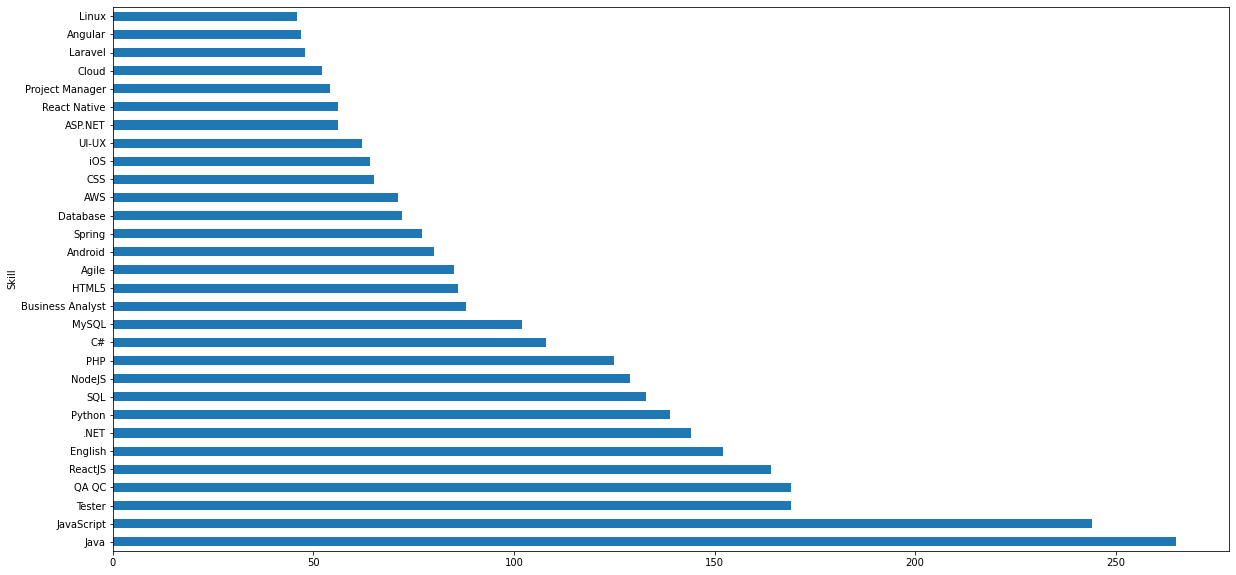

In [40]:
taglist[0:30].plot(kind = 'barh', figsize = (20,10), ylabel = "Amount", xlabel = "Skill")

Với một vài bước biến đổi đơn giản, ta đã có thể trực quan hóa được tính thiết yếu của các kỹ năng.

Số lượng càng cao nghĩa là càng có nhiều công việc cần kỹ năng đó và ngược lại.

Qua việc visualization ở trên, dễ dàng ta có thể nhận ra:
* Về mặt ngôn ngữ lập trình: Java, Javascript là 2 ngôn ngữ được tuyển dụng nhiều nhất, với trên 200 lượt tuyển dụng.
* Về mặt kỹ năng: các kỹ năng về QA QC, Tester là 2 vị trí đang được tuyển dụng nhiều nhất với trên 150 lượt tuyển dụng.
* Về mặt ngôn ngữ: English luôn là lựa chọn hàng đầu với trên 150 lượt.

### 3.1.4 Kết luận

Quay trở lại câu hỏi, như vậy các kỹ năng/kiến thức nào được các công ty tuyển dụng nhiều nhất?

Java, JavaScript, QA QC, Tester, ReactJS, English,... là các kiến thức, kỹ năng được tuyển dụng nhiều nhất. Bởi lẽ do tính đa dụng của nó. Ví dụ như Java hay JavaScript vừa có thể code web mà cũng có thể code app và có thể làm thêm nhiều thứ nữa.

Như vậy, cần học gì để không thất nghiệp, dễ dàng có việc làm?

Trong tương lai gần, thì ta có thể chọn học các ngôn ngữ như Java, JavaScript, rèn luyện thêm ngoại ngữ như English bởi lẽ nhu cầu tuyển dụng của các công ty về các kỹ năng này rất cao, mà nhân lực có kỹ năng tại Việt Nam hiện tại vẫn chưa đáp ứng đủ. Chính vì vậy, dựa vô thống kê, trực quan ở trên, ta có thể xác định được hướng đi để có thể dễ dàng kiếm được công việc sau khi ra trường.

## 3.2 Những quốc gia nào có số lượng tuyển nhân lực ngành IT ở Việt Nam lớn nhất?

### 3.2.1 Nêu vấn đề

Giữa một thị trường hiện đang rất màu mỡ như IT khiến cho người người nhà nhà chạy đua nhau học. Để cạnh tranh cơ hội có việc làm tốt ở một công ty thuộc nước ngoài là điều càng ngày khó khăn hơn.

Vậy khi tuyển dụng, giữa 2 ứng viên có technical skill ngang nhau thì người ta sẽ ưu tiên ai? Câu trả lời là nhà tuyển dụng sẽ ưu tiên người có ngoại ngữ tốt, giao tiếp tốt, phù hợp với công ty, văn hóa của họ và có thể giao tiếp trao đổi trực tiếp với người nước ngoài.

Đối với một nhân viên thì việc biết được văn hóa công ty đó, có khả năng giao tiếp trực tiếp với sếp của họ bằng chính tiếng của họ sẽ có khả năng thăng tiến cao hơn bởi họ sẽ là người làm việc trực tiếp với sếp mà không cần thông qua người khác.

Như vậy, nếu biết được những quốc gia đang đầu tư mạnh về lĩnh vực IT ở Việt Nam, ta sẽ tìm hiểu về văn hóa đất nước đó để tìm hiểu về cách làm việc cũng như chọn ngôn ngữ đó làm ngoại ngữ thứ 2 để có thể học, tạo lợi thế cho bản thân khi ứng tuyển và cơ hội thăng chức khi đã làm việc là một điều cần làm.

### 3.2.2 Data Preprocessing

Trước tiên ta phải merge 2 bộ dữ liệu với nhau để gắn kết công việc nào thuộc công tin nào, dựa vào cột `company_id`

In [41]:
jobs_companies_df = pd.merge(jobs_df, companies_df, on = "company_id")
jobs_companies_df.head()

,job_id,company_id,job_name,taglist,location,three_reasons,description,company_name,average_rating,num_reviews,cities,type,num_employees,country,working_days,overtime,overview,expertise,benefit
0,kms-technology:jrsr_qa_engineer_kms_labs_bonus,kms-technology,"(Jr/Sr) QA Engineer, KMS Labs - BONUS",QA QC English Tester,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs is the startup incubation arm of KMS ...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
1,kms-technology:engineering_manager_bonus,kms-technology,Engineering Manager - BONUS,Project Manager Agile English,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary. ***Apply and Join in S...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
2,kms-technology:fullstack_mobile_mobilenodejs_k...,kms-technology,"Fullstack Mobile (Mobile,NodeJs) Kobiton",NodeJS React Native Fresher Accepted,"02 Tan Vien, ward 2, Tan Binh, Ho Chi Minh",Inspired Leadership Team and Talented Colleagu...,is the mobile experience platform trusted by l...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
3,kms-technology:jrsrprincipal_java_developer_bonus,kms-technology,(Jr/Sr/Principal) Java Developer- BONUS,Java JavaScript Spring,"174 Thai Ha, Dong Da, Ha Noi",Inspired Leadership Team and Talented Colleagu...,Full 13th Month Salary ***Apply and Join in Se...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...
4,kms-technology:product_manager_kms_labs_bonus,kms-technology,"Product Manager, KMS Labs - BONUS",Product Manager English Manager,"290/26 Nam Ky Khoi Nghia, ward 8, District 3, ...",Inspired Leadership Team and Talented Colleagu...,KMS Labs\n is the startup incubation arm of KM...,KMS Technology,4.0,197.0,"Ho Chi Minh, Da Nang, Ha Noi",Outsourcing,1000+,United States,Monday - Friday,No OT,"Established in 2009, KMS Technology is a U.S.-...",NaN,Want to be the Best? Join KMS!\n\n\nIt’s posit...


Loại bỏ những cột không liên quan, chỉ sử dụng cột cần thiết.

In [42]:
columns = ["company_name", "num_employees", "country","job_id"]
jobs_companies_df = jobs_companies_df[columns]
jobs_companies_df

,company_name,num_employees,country,job_id
0,KMS Technology,1000+,United States,kms-technology:jrsr_qa_engineer_kms_labs_bonus
1,KMS Technology,1000+,United States,kms-technology:engineering_manager_bonus
2,KMS Technology,1000+,United States,kms-technology:fullstack_mobile_mobilenodejs_k...
3,KMS Technology,1000+,United States,kms-technology:jrsrprincipal_java_developer_bonus
4,KMS Technology,1000+,United States,kms-technology:product_manager_kms_labs_bonus
...,...,...,...,...
1406,Go Game Vietnam Limited Liability Company,1-50,Singapore,go-game-vietnam-limited-liability-company:unit...
1407,Đại Việt Group,501-1000,Vietnam,dai-viet-group:software_developer_net_c_aspnet
1408,MISA SOFTWARE,1000+,Vietnam,misa-software:net_dev_net_core_c_signon_bonus
1409,Thuocsi.vn,151-300,Vietnam,thuocsi-vn:remote_fullstack_dev_javascript


Dữ liệu đã sẵn sàng để phân tích và trực quan.

### 3.2.3 Analysis, Visualization

Trước hết, ta phải thống kê số lượng các tuyển dụng theo quy mô công ty và quốc gia (`num_employees` và `country`)

In [43]:
country_size_num = jobs_companies_df.groupby(["country","num_employees"]).size().sort_values(ascending=False)
country_size_num = country_size_num[0:30]
country_size_num

country             num_employees
Vietnam             1-50             262
                    51-150           167
                    1000+            129
                    151-300          122
Singapore           51-150            65
                    1-50              61
Vietnam             301-500           42
United States       51-150            39
Japan               1-50              37
                    51-150            36
United States       1-50              36
Vietnam             501-1000          28
Australia           51-150            21
United States       1000+             20
Korea, Republic of  51-150            20
Germany             51-150            15
Korea, Republic of  1-50              15
Germany             1-50              15
United States       151-300           14
Australia           1-50              14
Japan               301-500           12
France              301-500           11
Switzerland         51-150            11
United States       301

Mục tiêu của công hỏi này nhằm hỏi về các công ty nước ngoài nên ta sẽ loại bỏ `Vietnam` để dữ liệu cân đối, không bị lệch quá về `Vietnam` và trực quan hóa cũng sẽ đẹp hơn.

Ngoài ra ta còn phải sắp xếp lại các cột cho đúng với thứ tự ý nghĩa của nó.

In [44]:
country_size_num = country_size_num.unstack().drop("Vietnam")
country_size_num = country_size_num[["1-50","51-150","151-300","301-500","501-1000","1000+"]]
country_size_num

num_employees,1-50,51-150,151-300,301-500,501-1000,1000+
country,,,,,,
Singapore,61.0,65.0,NaN,NaN,NaN,NaN
United States,36.0,39.0,14.0,11.0,NaN,20.0
Japan,37.0,36.0,NaN,12.0,NaN,NaN
Australia,14.0,21.0,NaN,9.0,NaN,NaN
"Korea, Republic of",15.0,20.0,NaN,NaN,NaN,NaN
Germany,15.0,15.0,NaN,8.0,NaN,NaN
France,8.0,8.0,NaN,11.0,NaN,NaN
Switzerland,NaN,11.0,NaN,NaN,NaN,NaN
Norway,NaN,10.0,NaN,NaN,NaN,NaN


Sử dụng biểu đồ cột chồng (stacked bar chart) để thể hiện được mối quan hệ thành phần, số lượng công việc tuyển dụng của các quốc gia theo các quy mô công ty.

<AxesSubplot:xlabel='country'>

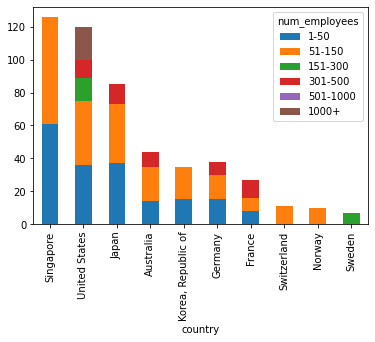

In [45]:
country_size_num.plot(kind = "bar", stacked = True)

### 3.2.4 Kết luận

Như vậy, ta đã có thể trả lời được câu hỏi: "Quốc gia nào đang tuyển dụng nhân lực ngành IT nhiều nhất tại Việt Nam?"

Qua trực quan thì dễ dàng thấy được `Singapore`, `United States` và `Japan` là 3 quốc gia hiện tại đang tuyển dụng nhiều nhân lực ngành IT ở Việt Nam với hơn 80 job hiện tại. Tuy nhiên thì các công ty đang tuyển dụng nhân lực đa phần còn non trẻ, có quy mô nhỏ, quy mô chủ yếu khoảng `1-50` và `51-150`. Điều này càng phản ánh 1 điều, càng ngày các quốc gia nước ngoài đang có xu hướng đầu từ dần sang Việt Nam bằng cách mở các chi nhánh nhỏ rồi dần quy mô hóa công ty. Cho thấy được khả năng ngoại ngữ có mức độ quan trọng rất lớn. 

Nhìn chung đa phần các quốc gia đều sử dụng tiếng Anh để có thể làm việc chung. Tuy nhiên ngoài các quốc gia sử dụng thuần tiếng Anh thì `Japan`,`Korea`, `Germany` hay `France` còn sử dụng ngôn ngữ gốc. Việc chọn một trong các ngôn ngữ này học sẽ là một lợi thế lớn trong việc tuyển dụng, làm việc và thăng tiến sau này nếu làm trong các công ty thuộc quốc gia đó.

## 3.3 Câu hỏi 3

### 3.3.1 Nêu vấn đề

Với lượng dữ liệu công việc lớn như hiện tại, việc lọc ra một công việc tốt về khoa học dữ liệu là một việc tương đối khó khăn. Trong phần này, ta sẽ phân tích và biến đổi trên dữ liệu để trả lời về vấn đề: _Tìm ra trên tập dữ liệu này những công việc nào tốt nhất liên quan đến khoa học dữ liệu_. Trả lời được cho vấn đề này sẽ giúp cho những người có mong muốn ứng tuyển vào vị trí liên quan đến khoa học dữ liệu tìm cho mình công việc được đánh giá tốt nhất. Ngoài ra, các trang web đăng tải thông tin tuyển dụng có thể ứng dụng phương thức này để gợi ý cho người dùng có nhu cầu được tuyển dụng vào lĩnh vực khoa học dữ liệu.

Để trả lời được cho câu hỏi trên, ta cần trả lời được hai câu hỏi phụ sau:
1. Công việc như thế nào là có liên quan đến khoa học dữ liệu?
2. Trong những công việc đó, công việc nào là tốt nhất?

### 3.3.2 Data Preprocessing

Hướng tiếp cận chung của ta như sau:
1. Ta sẽ cố gắng đánh giá _độ liên quan_ của một công việc đối với ngành khoa học dữ liệu. Cụ thể, ta sẽ dựa vào tiêu đề, taglist và mô tả của công việc để đánh giá và đưa ra một con số cho biết công việc đó liên quan nhiều hay ít đến khoa học dữ liệu.
2. Từ tập công việc này, ta đánh giá mức độ tốt hay không tốt dựa trên điểm đánh giá trung bình và số lượt đánh giá của công ty đăng tải bài ứng tuyển. Để gợi ý đến cho người dùng, ta sẽ sắp xếp tập công việc này lần lượt theo các giá trị: độ liên quan, điểm đánh giá trung bình của công ty, và số lượt đánh giá công ty.

Đầu tiên, ta tách ra những trường cần thiết để đánh giá và tiền xử lý.

In [46]:
job_list_df = jobs_df[['job_id', 'job_name', 'description', 'taglist']].copy()

Ta thực hiện bước tiền xử lý như sau:
1. Vì ta đang xử lý trên chuỗi, ta đưa chúng về dạng chữ viết thường để tiện lợi. 
2. Ta nhận thấy cột `taglist` có cấu trúc cụ thể - các tag cách nhau bằng 3 ký tự khoảng trắng, do đó ta chuyển các giá trị của cột này về dạng list.
3. Đặt `job_id` làm index

In [47]:
job_list_df.job_name = job_list_df.job_name.map(lambda x: x.lower())
job_list_df.description = job_list_df.description.map(lambda x: x.lower())
job_list_df.taglist = job_list_df.taglist.map(lambda x: x.lower().split('   '))
job_list_df = job_list_df.set_index('job_id')

Để đánh giá độ liên quan đến khoa học dữ liệu của một công việc, ý tưởng chính như sau: ta kiểm tra xem các trường `job_name`, `taglist` và `description` có chứa những từ khóa nào liên quan đến khoa học dữ liệu hay không
* Ta chọn ra các từ khóa đặc trưng cho ngành khoa học dữ liệu. Ta phân chúng thành 5 tier, `t1` đến `t5`.
* Gán cho mỗi tier một trọng số đánh giá _mức độ đặc trưng_ của tier đối với ngành khoa học dữ liệu. Gán `t1` điểm 1, ..., `t5` điểm 5.

Dưới đây em đã chọn ra và sắp xếp các từ khóa đặc trưng cho ngành khoa học dữ liệu. Các từ khóa này được em chọn thông qua việc đọc description của công việc từ dữ liệu, tham khảo, tìm kiếm trên Internet và cảm nhận của bản thân. Cách chia các tier này là hoàn toàn chủ quan.

In [48]:
t5 = ['data science', 'data scientist', 'khoa học dữ liệu'] 
t4 = ['data analysis', 'data analyst', 'data analytics', 'phân tích dữ liệu',
      'data visualization', 'data preprocessing', 'data mining', 'trực quan hóa', 'xử lý dữ liệu', 'khai thác dữ liệu',
      'data engineer', 'data warehouse', 'kỹ sư dữ liệu', 'nhà kho dữ liệu',
      'data pipelining', 'aws', 'business intelligence',
      'ssps', 'tableau',
      'pytorch', 'tensorflow',
      'pandas', 'numpy', 'scikit-learn', 'scipy', 
      'spark', 'keras', 'hadoop',
      'nltk', 'scala']
t3 = ['statistics', 'thống kê',
      'ai', 'artificial intelligence', 'trí tuệ nhân tạo',
      'big data', 'machine learning', 'học máy', 'máy học', 'dữ liệu lớn',
      'deep learning', 'học sâu',
      'data architect']
t2 = ['sql', 'nosql', 'julia',
      'cloud computing', 'điện toán đám mây']
t1 = ['data', 'database', 'dữ liệu', 'cơ sở dữ liệu',
      'english', 'python', 'tiếng anh',
      'analyst', 'phân tích', 'cloud', 'đám mây'
      'java']

weights = np.array([1, 2, 3, 4, 5])

### 3.3.3 Analysis, Visualization

Ta chấm điểm cho các trường như sau:
* Với mỗi tier, ta kiểm tra từng trường `job_name`, `taglist` và `description`, nếu trường có chứa ít nhất 1 từ khóa trong tier, ta chấm điểm cho trường đó bằng trọng số của tier. Nếu không, ta chấm điểm 0.
	* Ví dụ, giả sử ta xét trên tier 5, trường `job_name` và `description` có chứa từ khóa `"data science"`, trường `taglist` thì không => điểm của các trường lần lượt là `[5, 0, 5]`.
* _Độ liên quan_ của một công việc được tính bằng tổng số điểm của các trường, trên tất cả các tier. Số điểm càng cao thì độ liên quan càng lớn. Cách tính tổng này sẽ được trình bày ở phần dưới.

Dưới đây, hàm `contains()` kiểm tra xem một giá trị có chứa keyword nào trong danh sách các keyword hay không. Hàm `grade()` chấm điểm cho từng giá trị của các trường (lưu ý `tier` trong `grade` là chỉ số). Sau đó, ta xây dựng một mảng 3 chiều `grade_board`, sao cho `grade_board[:, :, x]` là một ma trận điểm của các trường xét trên `tier[x]`. Các hàm `reshape` chuyển đổi `shape` của các ma trận sao cho phù hợp để broadcast.


In [49]:
tiers = [t1, t2, t3, t4, t5]

def contains(x, tier):
    return any(keyword in x for keyword in tier)

def grade(x, tier):
    return contains(x, tiers[tier]) * weights[tier]

f = np.vectorize(grade)
grade_board = f(job_list_df.values.reshape((*job_list_df.shape, 1)), np.arange(5).reshape((1, 1, 5)))

Có được ma trận điểm, ta sẽ tiến hành tính tổng số điểm cho các công việc. Ở đây ta định nghĩa thêm một loại trọng số nữa cho ba trường `job_name`, `taglist`, `description`, cụ thể là `[0.5, 0.3, 0.2]`. Lý do là vì:
* Thông thường tiêu đề của công việc có ý nghĩa quan trọng nhất cho việc xác định lĩnh vực của công việc đó.
* `taglist` chỉ có tối đa 3 tag, không đủ để xác định lĩnh vực của công việc, do đó không quan trọng bằng `job_name`.
* Một số mô tả công việc có thể chứa các từ khóa có liên quan đến khoa học dữ liệu, nhưng với mục đích chỉ là nhắc đến lĩnh vực khoa học dữ liệu, chứ không phải mô tả những vấn đề cụ thể của công việc.
	* Ví dụ trong mô tả công việc về mobile developer có thể có đoạn như sau: "Knowledge in machine learning or artificial intelligence is a plus". Mô tả này có chứa hai keyword thuộc tier 3 (machine learning và artificial intelligence), tuy nhiên mục đích chỉ là nhắc đến hai kỹ năng là điểm cộng, nội dung chính của mô tả vẫn là về mobile developer. Do đó, đặt trọng số thấp cho trường `description` sẽ giúp giảm thiểu khả năng gặp trường hợp này.

Ta tiến hành tính tổng cho các trường trên các tier, sau đó gom tất cả các trường lại theo trọng số để ra được độ liên quan của từng công việc. Ta thêm kết quả này vào cột `score` trong `job_list_df`.

In [50]:
field_weights = np.array([0.5, 0.3, 0.2])
scores = ((grade_board).sum(axis=2) * field_weights).sum(axis=1)
job_list_df['score'] = scores

Dưới đây là phân bố số điểm của các công việc. Có thể thấy hầu hết các số điểm công việc rơi vào khoảng 2 đến 4 (lưu ý, số điểm tối đa cho một công việc là 15 (1 + 2 + ... + 5)), không có nhiều công việc liên quan đến khoa học dữ liệu trong dữ liệu này.

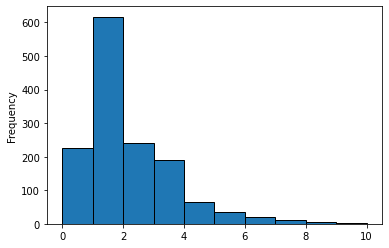

In [51]:
job_list_df['score'].plot(kind='hist', edgecolor='black')
plt.show()

Dưới đây là top 15 công việc có liên quan nhất đến ngành khoa học dữ liệu. Có thể thấy phương pháp ta thực hiện cho ra kết quả tương đối khả quan.

In [52]:
job_list_df.sort_values('score', ascending=False)[:15]

,job_name,description,taglist,score
job_id,,,,
adverttu:data_scientist_python_sql_aws_remote,"data scientist (python, sql, aws) remote",adverttu is hiring an experienced data scienti...,"[ python, sql, aws ]",10.0
zalora-group:sr_data_scientist_machine_learning_r,"sr data scientist (machine learning, r)",we are looking for an exceptional senior data ...,"[ java, python, scala ]",9.2
viettel-group:10_bigdata_engineers_java_scala_sql,"10 bigdata engineers (java, scala, sql)",khối cntt trực thuộc tổng công ty (tct) viễn t...,"[ java, sql, scala ]",8.4
haravan:senior_data_engineer_bi_python_sql,"senior data engineer (bi, python, sql)",we are looking for a senior business intellige...,"[ business analyst, sql, data analyst ]",8.4
parcel-perform:data_engineer_database_sql_python,"data engineer (database, sql, python)",parcel perform is looking for an amazing team ...,"[ database, python, sql ]",8.2
chotot:data_engineer_sql_python,"data engineer (sql, python)",cho tot technology foundation is growing and e...,"[ database, python, sql ]",8.2
ihouzz-tech:data_analyst_python_java_sql,"data analyst (python, java, sql)","· understand business processes, applica...","[ java, python, sql ]",8.2
eplus-research:data_analyst_sql_online_interview,data analyst (sql) - (online interview),công ty \neplus research\n là đơn vị cung cấp ...,"[ python, database, sql ]",8.2
deliveree-on-demand-logistics:data_scientist,data scientist,company description\n\n\nwe own and operate so...,"[ database, python, postgresql ]",7.7


Để dễ sắp xếp, ta làm tròn giá trị cột `score` thành số nguyên.

In [53]:
job_list_df['score'] = job_list_df['score'].round().map(int)

Ta join cột `score` vào cùng với các thông tin gốc về công ty và công việc để chuẩn bị cho bước kết luận.

In [54]:
final = jobs_df[['job_id', 'company_id', 'job_name', 'description']]\
    .merge(companies_df[['company_id', 'company_name', 'average_rating', 'num_reviews']], on='company_id', how='inner')\
    .merge(job_list_df['score'], on='job_id', how='inner')

### 3.3.4 Kết luận

Dưới đây là top 10 công việc tốt nhất liên quan đến khoa học dữ liệu dựa theo phương thức đánh giá của ta. Theo đó, công việc của công ty  Adverttu được xếp lên trên cùng do có độ liên quan lớn nhất. Nhưng có vẻ như công việc tốt nhất phải là công việc của công ty ZALORA Group với độ hợp cao, điểm đánh giá trung bình cùng số lượt đánh giá cũng khả quan. Các công việc còn lại trong nhóm 8 điểm cũng tương đối ổn.

In [55]:
final.sort_values(
    ['score', 'average_rating', 'num_reviews'],
    ascending=[False, False, False])[['job_name', 'score', 'company_name', 'average_rating', 'num_reviews', 'description']][:10]

,job_name,score,company_name,average_rating,num_reviews,description
1317,"Data Scientist (Python, SQL, AWS) REMOTE",10,Adverttu,NaN,NaN,Adverttu is hiring an experienced Data Scienti...
583,"Sr Data Scientist (Machine Learning, R)",9,ZALORA Group,4.6,54.0,We are looking for an exceptional Senior Data ...
287,"Data Engineer (Database, SQL, Python)",8,Parcel Perform,4.9,17.0,Parcel Perform is looking for an amazing team ...
620,"Senior Data Engineer (BI, Python, SQL)",8,HARAVAN,4.3,38.0,We are looking for a Senior Business Intellige...
239,Data Scientist,8,Deliveree On-Demand Logistics,4.0,12.0,Company Description\n\n\nWe own and operate So...
241,"Data Engineer (SQL, Python)",8,Chotot,3.6,20.0,Cho Tot technology foundation is growing and e...
226,"10 BigData Engineers (Java, Scala, SQL)",8,Viettel Group,3.5,22.0,Khối CNTT trực thuộc Tổng công ty (TCT) Viễn T...
89,Data Science/ Data Analyst (BI),8,Vietnam International Bank (VIB),2.8,6.0,Mục đích công việc:\n\n\nChịu trách nhiệm xây ...
401,"Data Analyst (Python, Java, SQL)",8,IHOUZZ TECH,NaN,4.0,"· Understand business processes, applica..."
1074,Jr/Sr Data Scientist (Java/Python/Scala),8,MB Bank,NaN,1.0,- Làm việc với các đơn vị nghiệp vụ để xác địn...


Như vậy ta đã trả lời được cho câu hỏi công việc nào tốt nhất liên quan đến khoa học dữ liệu. Bên cạnh đó, ta cũng tạo ra được một phương pháp đánh giá độ liên quan của công việc đến một lĩnh vực. Việc sử dụng lại phương pháp này cũng đơn giản, ta có thể:
* Thay đổi các từ khóa trong từng tier theo lĩnh vực mong muốn
* Thêm hoặc xóa bớt tier
* Thay đổi trọng số cho các tier
* Thay đổi trọng số cho các trường

# 4. Cảm nhận sau khi kết thúc môn học

## 4.1 Lê Đức Huy - 19120080

Trước hết là về giảng viên hướng dẫn là thầy Trần Trung Kiên:

Không phải em cố tình khen nhưng thực sự thầy dạy học rất nhiệt tình, thầy rất thân thiện với sinh viên đôi khi còn hay đùa để tạo tiếng cười giúp buổi học đỡ căng thẳng mệt mỏi, bài học của thầy rất cụ thể với từng bước demo rất rõ ràng, dễ hình dùng và hiểu bài rõ hơn.

Thứ 2 là về môn học "Lập trình cho khoa học dữ liệu":

Với một người dần mất định hướng về nghề nghiệp như em thì khi đăng ký học môn này quả là một lựa chọn đúng đắn. Kiến thức môn học này tuy chỉ ở mức "basic" nhưng thực sự rất hay, mở ra một con đường mới mà em có thể theo đuổi.

Từ khi bắt đầu với xuất phát điểm hơi thấp như là mới biết về cơ bản Python, chỉ sử dụng Windows thì qua môn học này thì em có thêm nhiều kiến thức mới, dần làm quen với vài câu lệnh Linux, làm việc nhiều hơn với Python, với các thư viện về dữ liệu và càng ngày kỹ năng càng được cải thiện rõ rệt qua các bài tập lab. Nếu xui xui rớt môn thì chắc chắn em sẽ đăng ký học lại ><! =)

Chung quy lại là môn học này hay, kiến thức bổ ích, giảng viên nhiệt tình, nên học dù là có theo hướng data science hay không vì tính ứng dụng có nó mang lại, có thể sử dụng trong nhiều công việc sau này.

## 4.2 Mai Duy Nam - 19120298
Đối với em, quá trình làm đồ án diễn ra tương đối thuận lợi. Các bước làm đồ án, từ tìm kiếm dữ liệu, phân chia việc với Huy, khám phá, phân tích dữ liệu đều diễn ra suôn sẻ. Em chỉ gặp khó khăn trong giai đoạn suy nghĩ câu hỏi có ý nghĩa để trả lời, vì bộ dữ liệu này có tương đối ít dữ liệu số. Tuy nhiên sau khi tìm ra được bài toán ưng ý để giải thì mọi bước sau đó diễn ra thuận lợi và không gặp trở ngại gì lớn.

Trong quá trình làm đồ án, em không thực sự học thêm kiến thức mới ngoài những kỹ năng đã học trên lớp (NumPy, pandas, matplotlib). Tuy nhiên em được dịp luyện tập sử dụng các công cụ quan trọng này, luyện tập các kiến thức như xử lý dữ liệu nhiều chiều, array programming. Có thể nói, sau đồ án này em cũng đạt được độ thành thạo nhất định trong việc làm việc với các công cụ quan trọng của khoa học dữ liệu.

## 4.3 Phương hướng phát triển nếu còn thời gian

Nếu có thêm thời gian, có thể sẽ phân tích sâu về description tìm kiếm những thông tin về salary, mở rộng thêm về những kỹ năng nào sẽ ứng với các mức lương như nào,...

Đối với câu hỏi của Nam, nếu có thêm thời gian, em sẽ cải thiện một số điều như sau:
* Trong phân tích này, các từ khóa được lựa chọn và sắp xếp một cách chủ quan. Em có thể thay đổi điều này bằng cách áp dụng các mô hình học máy để xác định các từ khóa đặc trưng cho từng lĩnh vực.
* Làm tốt hơn trong việc tiền xử lý chuỗi bằng tokenization và lemmatization.
* Thêm các cách đánh giá mới cho một trường, thay vì chỉ xác định xem có từ khóa nào nằm trong trường hay không, ví dụ: kiểm tra trường có chứa một _bộ_ các từ khóa hay không.

# 5. Tài liệu tham khảo

* [Dataset](https://www.kaggle.com/halhuynh/it-jobs-dataset)
* [pandas documentation](https://pandas.pydata.org/docs/)
* [NumPy Documentation](https://numpy.org/doc/)
* [Matplotlib 3.5.1 documentation](https://matplotlib.org/stable/)